In [1]:
# developed from the following material, change dummy coding and outlier detection method 

# https://medium.com/towards-data-science/xgboost-for-multi-class-classification-799d96bcd368
# https://github.com/ernestng11/touchpoint-prediction/blob/master/data-cleaning_and_eda.ipynb
# data: https://github.com/ernestng11/touchpoint-prediction--- use the xlsx file 

In [2]:
import pandas as pd
import numpy as np

In [4]:
# "sheet_name=0" implies that we want to read the first sheeet in the excel file since "0" is considered a number in the python language that prefaces "1"
# in this case, there is only one tab anyway, so that's the one we end up reading with this python / pandas (since "pd" has been established as "pandas") function.
df = pd.read_excel('./marketdata.xlsx', sheet_name=0)

In [5]:
# "head" picks the top five rows, 0 through 4
df.head()

,age,marital,segment,SocialMedia,income,creditRating,aveSpend,touchpoints,nTouchpoints
0,38,single,P4,,51000.0,C,5007.50,emailDestination mailDiscount,2
1,39,divorced,P3,,100000.0,B,19.74,emailDestination mailGift,2
2,41,married,P4,N,51000.0,D,320.10,emailDiscount mailGift emailDiscount,3
3,57,single,P2,Y,80600.0,C,164.21,NaN,0
4,60,married,P4,,152000.0,C,39.47,mailDiscount,1


In [6]:
# "shape" defines the length and width of the data set.
df.shape

(20000, 9)

In [7]:
# this identifies all duplicated rows and then presents them as follows.
# in this case, it appears there are 2,268 duiplicate rows, spanning 9 columns.
duplicate = df[df.duplicated()]
 
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,age,marital,segment,SocialMedia,income,creditRating,aveSpend,touchpoints,nTouchpoints
81,58,married,P2,,75000.0,A,272.22,emailDestination emailGift emailDestination,3
564,56,married,P3,N,95000.0,A,880.15,mailGift emailGift mailDestination emailDiscou...,5
944,35,single,P4,,55000.0,A,416.05,NaN,0
977,26,divorced,P3,,110000.0,B,0.45,smsDiscount,1
1230,35,married,P2,N,34000.0,C,6352.89,mailGift mailDiscount emailDiscount emailDesti...,7
...,...,...,...,...,...,...,...,...,...
19976,32,single,P3,N,65000.0,C,12.13,emailDestination,1
19982,28,single,P2,N,96000.0,C,17.42,emailDestination emailDestination,2
19986,36,married,P1,Y,115000.0,A,3143.46,emailDiscount smsGift emailDestination mailDes...,8
19987,29,single,P4,Y,81000.0,B,73.88,smsDiscount emailDiscount,2


In [9]:
# this formula eliminates duplicates from our data frame 1
df1 = df.drop_duplicates()

In [10]:
# once again, "shape" defines the length and width of the data set.
# after dropping the 2,268 duplicates from the data set of 20,000, we check the "shape" again and see we are now left with 17,732 rows of data and still 9 columns.
df1.shape

(17732, 9)

In [11]:
# Checking for missing values
df1.isnull().sum()
# SocialMedia has no missing values but we see 'missing' -- > they are coded as whitespace ' '
# to eliminate this whitespace issue, we will need to trim and/or clean the data.
# in structured query language (SQL), it's more likely to be called "Trim."
# In python, it's more likely to be called "Strip."
# whitespace can also be used as a delimiter to separate one column into multiple columns.
# Therefore, sometimes, whitespace has its uses and whether or not you clean it depends on the situation.

age                0
marital            0
segment            0
SocialMedia        0
income             0
creditRating     521
aveSpend           0
touchpoints     4755
nTouchpoints       0
dtype: int64

In [12]:
# "def" means define, so here, we're defining a new function, "nan_check(data)"
# use a different method
def nan_check(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent_1 = data.isnull().sum()/data.isnull().count()*100
    percent_2 = (np.round(percent_1, 1)).sort_values(ascending=False)
    missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
    return missing_data

nan_check(df1)

,Total,%
touchpoints,4755,26.8
creditRating,521,2.9
age,0,0.0
marital,0,0.0
segment,0,0.0
SocialMedia,0,0.0
income,0,0.0
aveSpend,0,0.0
nTouchpoints,0,0.0


In [13]:
# only keep touchpoints>0 
# this eliminates another 4,755 rows of data (i.e., 17,732 - 12,977)
data = df1[df1['nTouchpoints']!=0].reset_index().drop('index', axis=1)
data # 12977 rows × 9 columns

,age,marital,segment,SocialMedia,income,creditRating,aveSpend,touchpoints,nTouchpoints
0,38,single,P4,,51000.0,C,5007.50,emailDestination mailDiscount,2
1,39,divorced,P3,,100000.0,B,19.74,emailDestination mailGift,2
2,41,married,P4,N,51000.0,D,320.10,emailDiscount mailGift emailDiscount,3
3,60,married,P4,,152000.0,C,39.47,mailDiscount,1
4,47,married,P2,Y,60000.0,A,19.89,mailDestination emailDestination emailDestination,3
...,...,...,...,...,...,...,...,...,...
12972,32,married,P1,,33000.0,E,4280.63,emailDestination emailDestination emailDestina...,7
12973,53,divorced,P3,N,61000.0,F,1332.29,smsDestination mailDiscount emailDestination e...,6
12974,30,single,P4,N,44000.0,C,4010.00,emailDestination emailDestination mailDiscount...,4
12975,52,married,P4,N,71000.0,C,507.46,emailDestination mailGift emailDiscount smsDes...,8


# create dummy

In [14]:
# method: split col into dummy var, then join back

## (1) touchpoints is a string col with multi-values, we can spilt it into mutiple col dummy variables

In [15]:
dummy = data['touchpoints'].str.get_dummies(sep=' ').rename(lambda x: 'touchpoint_' + x, axis='columns')
dummy

,touchpoint_emailDestination,touchpoint_emailDiscount,touchpoint_emailGift,touchpoint_mailDestination,touchpoint_mailDiscount,touchpoint_mailGift,touchpoint_smsDestination,touchpoint_smsDiscount,touchpoint_smsGift
0,1,0,0,0,1,0,0,0,0
1,1,0,0,0,0,1,0,0,0
2,0,1,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0
4,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
12972,1,0,1,0,1,0,0,0,0
12973,1,1,0,0,1,0,1,0,0
12974,1,0,0,0,1,0,0,0,0
12975,1,1,1,0,0,1,1,0,0


## (2) concat 

In [16]:
# "concat" is the python equivalent of the Excel-based "CONCATENATE," which is used to combine columns or rows of data
# other similarly useful python functions include "merge" and "join"
combo = pd.concat([data, dummy], axis=1)
combo

,age,marital,segment,SocialMedia,income,creditRating,aveSpend,touchpoints,nTouchpoints,touchpoint_emailDestination,touchpoint_emailDiscount,touchpoint_emailGift,touchpoint_mailDestination,touchpoint_mailDiscount,touchpoint_mailGift,touchpoint_smsDestination,touchpoint_smsDiscount,touchpoint_smsGift
0,38,single,P4,,51000.0,C,5007.50,emailDestination mailDiscount,2,1,0,0,0,1,0,0,0,0
1,39,divorced,P3,,100000.0,B,19.74,emailDestination mailGift,2,1,0,0,0,0,1,0,0,0
2,41,married,P4,N,51000.0,D,320.10,emailDiscount mailGift emailDiscount,3,0,1,0,0,0,1,0,0,0
3,60,married,P4,,152000.0,C,39.47,mailDiscount,1,0,0,0,0,1,0,0,0,0
4,47,married,P2,Y,60000.0,A,19.89,mailDestination emailDestination emailDestination,3,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12972,32,married,P1,,33000.0,E,4280.63,emailDestination emailDestination emailDestina...,7,1,0,1,0,1,0,0,0,0
12973,53,divorced,P3,N,61000.0,F,1332.29,smsDestination mailDiscount emailDestination e...,6,1,1,0,0,1,0,1,0,0
12974,30,single,P4,N,44000.0,C,4010.00,emailDestination emailDestination mailDiscount...,4,1,0,0,0,1,0,0,0,0
12975,52,married,P4,N,71000.0,C,507.46,emailDestination mailGift emailDiscount smsDes...,8,1,1,1,0,0,1,1,0,0


## warning: 
## don't rush to drop column and create dummy for other categorical variables; you need to check distributions and deal with outliers first

In [17]:
# the following function counts the total number of each value type for the "social media" field in each row (i.e. "y [4,328]," "n [4,293}," and whitespace [4,356])
# need to deal with the whitespace
combo.SocialMedia.value_counts()  

     4356
Y    4328
N    4293
Name: SocialMedia, dtype: int64

In [18]:
combo.loc[combo['SocialMedia'] == ' ', 'SocialMedia'] = 'U'
combo = combo.fillna(value={'creditRating': 'New'})
combo.head()

,age,marital,segment,SocialMedia,income,creditRating,aveSpend,touchpoints,nTouchpoints,touchpoint_emailDestination,touchpoint_emailDiscount,touchpoint_emailGift,touchpoint_mailDestination,touchpoint_mailDiscount,touchpoint_mailGift,touchpoint_smsDestination,touchpoint_smsDiscount,touchpoint_smsGift
0,38,single,P4,U,51000.0,C,5007.50,emailDestination mailDiscount,2,1,0,0,0,1,0,0,0,0
1,39,divorced,P3,U,100000.0,B,19.74,emailDestination mailGift,2,1,0,0,0,0,1,0,0,0
2,41,married,P4,N,51000.0,D,320.10,emailDiscount mailGift emailDiscount,3,0,1,0,0,0,1,0,0,0
3,60,married,P4,U,152000.0,C,39.47,mailDiscount,1,0,0,0,0,1,0,0,0,0
4,47,married,P2,Y,60000.0,A,19.89,mailDestination emailDestination emailDestination,3,1,0,0,1,0,0,0,0,0


In [19]:
combo.creditRating.value_counts()

C      3309
B      3259
A      2686
D      1759
E      1151
New     380
F       363
G        70
Name: creditRating, dtype: int64

<AxesSubplot:>

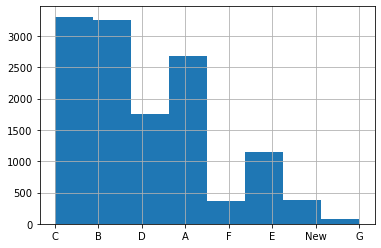

In [21]:
# the "hist" function generates a histogram
combo.creditRating.hist(bins = 8)

In [22]:
# check the relationship of segment with others
# possible basis: income, avg spending, credit reating, or their combination

In [23]:
pd.pivot_table(combo, index=['segment'], values=['income'], aggfunc='mean')

,income
segment,
P1,71221.508515
P2,71636.399466
P3,72190.286588
P4,71883.688044


In [24]:
pd.pivot_table(combo, index=['segment'], values=['aveSpend'], aggfunc='mean')

,aveSpend
segment,
P1,713.667912
P2,703.399744
P3,720.049364
P4,739.730833


In [25]:
# Mean income and mean average spending in each segment does not show much variation. Explore further with credit rating
cred_income = pd.pivot_table(combo, index=['segment','creditRating'], values=['income'], aggfunc='mean').sort_values(['segment', 'income'], ascending=False)
cred_income 
#  so credit rate and income are somewhat correlated

income
segment creditRating              
P4      F             78720.535354
        A             75677.082861
        C             72755.476899
        B             72453.107954
        D             67469.535068
        E             66102.765227
        New           64110.574713
        G             59600.000000
P3      F             77662.672093
        A             75910.866667
        B             73684.474944
        C             70410.692604
        E             70182.794966
        D             70133.231366
        New           60955.155556
        G             55650.500000
P2      F             85279.503838
        A             77093.805152
        B             72184.951764
        C             71207.522471
        D             67737.245161
        E             67193.485000
        New           57184.803922
        G             51000.000000
P1      F             75695.030380
        A             75012.421662
        C             72414.985513
        B             71507.233389
        D             67117.589575
        E             67105.816702
        New           61064.772277
        G             59585.362500

In [26]:
avg_spend=pd.pivot_table(combo, index=['segment','creditRating'], values=['aveSpend'], aggfunc='mean').sort_values(['segment',
                                                                                                       'aveSpend'], ascending=False)
avg_spend
#  g has the highest spending across all seg, even though they have the low income level 

aveSpend
segment creditRating             
P4      G             1114.415500
        C              868.162088
        E              805.168598
        B              762.756560
        A              682.968003
        D              609.251347
        New            601.514023
        F              328.641515
P3      G             1149.958750
        C              838.391941
        A              736.658825
        B              706.867491
        D              667.085324
        F              621.818372
        E              591.177069
        New            327.680444
P2      G             1051.365556
        C              925.959417
        E              710.306346
        A              706.063515
        B              669.219201
        New            594.434510
        D              453.293054
        F              248.440202
P1      G             1448.316875
        C              840.794866
        New            789.227624
        A              748.944926
        E              700.862316
        D              635.812712
        B              601.597027
        F              508.090000

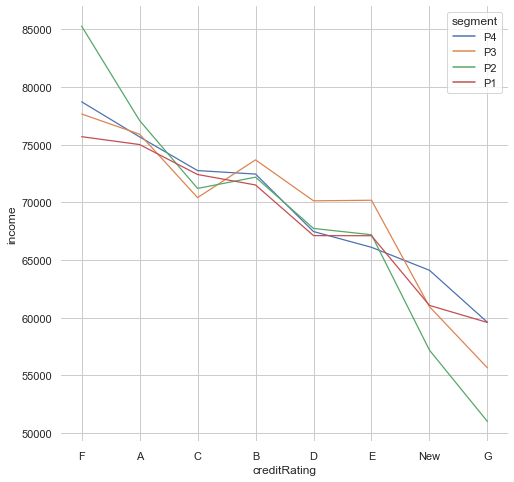

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(8,8))
sns.despine(f, left=True, bottom=True)
ax=sns.lineplot(data=cred_income.reset_index(),x='creditRating',y='income',hue='segment',
               sizes=(1, 8), linewidth=1.25)

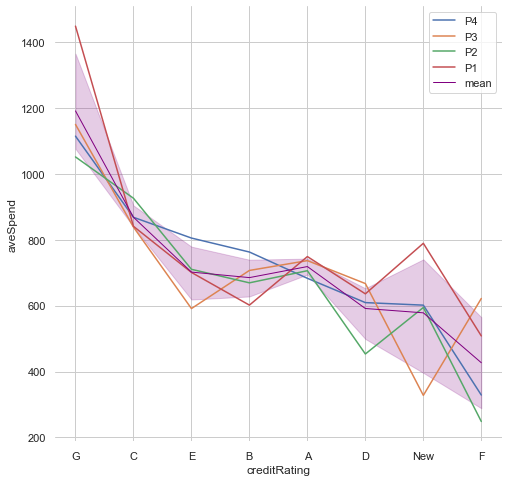

In [28]:
f, ax = plt.subplots(figsize=(8,8))
sns.despine(f, left=True, bottom=True)
ax=sns.lineplot(data=avg_spend.reset_index(),x='creditRating',y='aveSpend',hue='segment',
               sizes=(1, 8), linewidth=1.5)
ax2=sns.lineplot(data=avg_spend.reset_index(),x='creditRating',y='aveSpend',estimator='mean',
               sizes=(1, 8), linewidth=1,ci=95,color='purple',label='mean')

In [29]:
# There isn't a general pattern we can observe with average spending over each credit ratings as seen from each line plot for P1 to P4. 
# The purple line shows us mean average spending per credit rating group and its 95% confidence interval. 
# Comparing both plots, it seems that the high earners with credit rating of 6 spends less than others,
# and low earners with credit rating of 7 spends more than others.

# check for any multicollinearity between the numerical variables. 

In [30]:
combo.dtypes

age                              int64
marital                         object
segment                         object
SocialMedia                     object
income                         float64
creditRating                    object
aveSpend                       float64
touchpoints                     object
nTouchpoints                     int64
touchpoint_emailDestination      int64
touchpoint_emailDiscount         int64
touchpoint_emailGift             int64
touchpoint_mailDestination       int64
touchpoint_mailDiscount          int64
touchpoint_mailGift              int64
touchpoint_smsDestination        int64
touchpoint_smsDiscount           int64
touchpoint_smsGift               int64
dtype: object

In [31]:
combo[['age','income','aveSpend','nTouchpoints']].corr()
# correlaation between avgspend and ntouchpoints = 0.36

,age,income,aveSpend,nTouchpoints
age,1.000000,-0.004739,-0.022407,-0.025334
income,-0.004739,1.000000,-0.014994,0.011116
aveSpend,-0.022407,-0.014994,1.000000,0.364638
nTouchpoints,-0.025334,0.011116,0.364638,1.000000


In [32]:
# cmap = sns.diverging_palette(20,10, as_cmap=True)
# sns.heatmap(combo[['age','income','aveSpend','nTouchpoints']].corr(), vmax=1, center=0, cmap=cmap,
#             square=True, linewidths=.5, cbar_kws={"shrink":.5})

# # number of touch points is highly correlated with average spending however the correlation is low-moderate below 0.5. 
# # Since the degree of multicollinearity is not severe, I will leave the variables untouched.

## plot to check distributions

Plot for MARITAL: total counts = 4


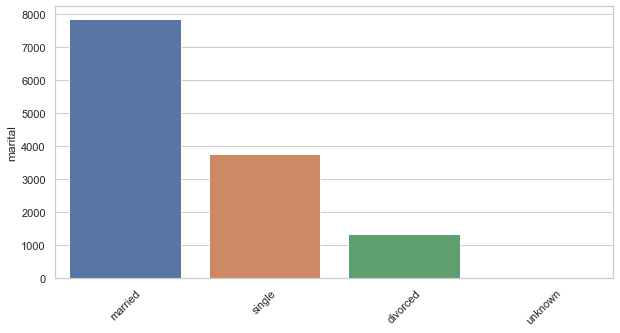

Plot for SEGMENT: total counts = 4


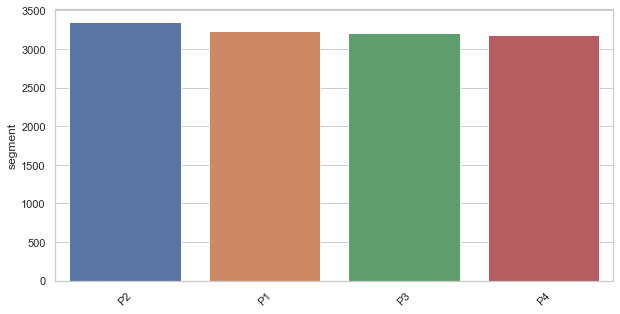

Plot for SOCIALMEDIA: total counts = 3


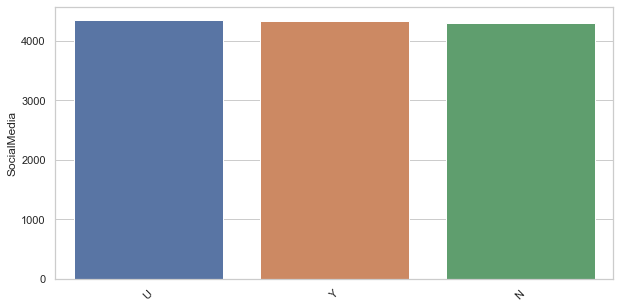

Plot for CREDITRATING: total counts = 8


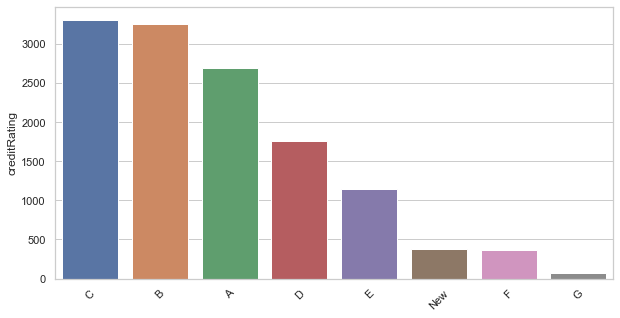

Plot for NTOUCHPOINTS: total counts = 8


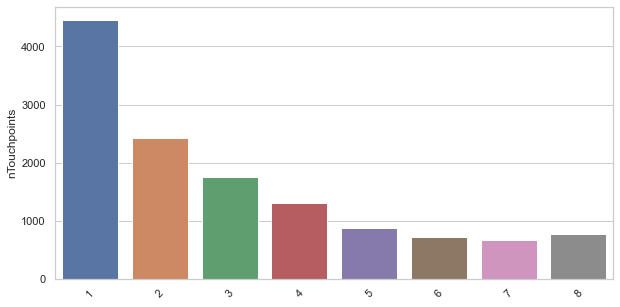

Plot for AGE: total counts = 41


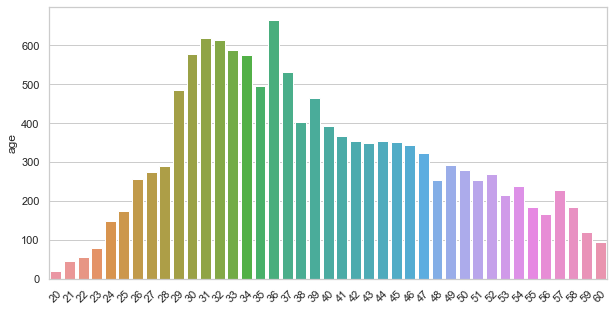

In [33]:
# plot categorical var
df_explore = combo[['marital','segment','SocialMedia','creditRating','nTouchpoints','age']]
for cat in df_explore:
    cat_num = df_explore[cat].value_counts()
    print("Plot for %s: total counts = %d" % (cat.upper(), len(cat_num)))
    f, ax = plt.subplots(figsize=(10,5))
    plot = sns.barplot(x=cat_num.index, y=cat_num)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
    plt.show()
    
    # marital has a very small unknown group 

Plot for AGE: total counts = 12977


E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-34-87e6b4fedb47>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45)


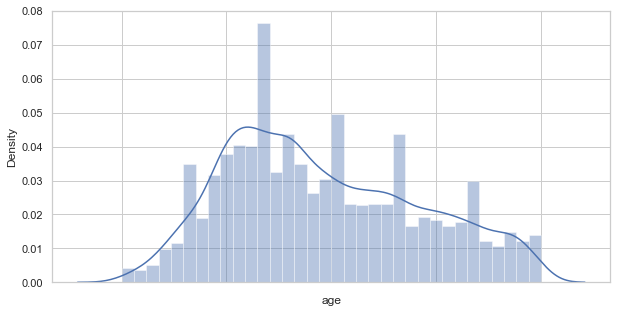

Plot for INCOME: total counts = 12977


E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-34-87e6b4fedb47>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45)


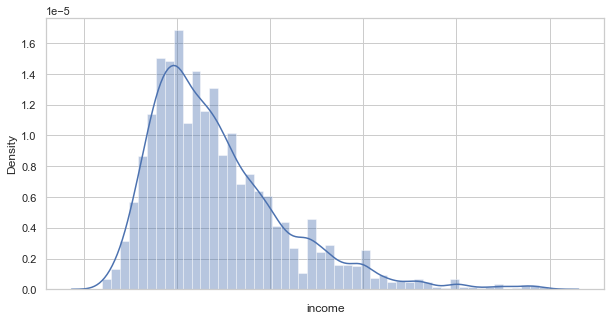

Plot for AVESPEND: total counts = 12977


E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-34-87e6b4fedb47>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45)


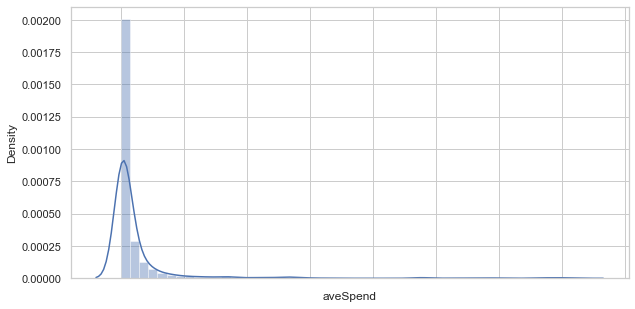

In [34]:
# plot numerical var
df_explore = combo[['age','income','aveSpend']]
for cat in df_explore:
    cat_num = df_explore[cat]
    print("Plot for %s: total counts = %d" % (cat.upper(), len(cat_num)))
    f, ax = plt.subplots(figsize=(10,5))
    plot = sns.distplot(cat_num)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
    plt.show()
    
#     'Average spending distribution can be considered exponential but has long tail--- need to deal with outliers

In [35]:
# the last graph above is very biased with a long tail; therefore, we need to check the values by percentile
combo.aveSpend.describe([0.25, 0.5,0.6, 0.7, 0.75, 0.8, 0.9, 0.95,0.96, 0.07, 0.98, 0.99, 0.991, 0.993,0.995])

count    12977.000000
mean       718.978065
std       2180.662408
min          0.000000
7%           4.886400
25%         20.440000
50%         91.760000
60%        164.210000
70%        299.460000
75%        430.700000
80%        583.300000
90%       1339.110000
95%       3377.930000
96%       4285.880000
98%       7292.880000
99%      14191.919200
99.1%    14579.780000
99.3%    16509.190000
99.5%    16756.960000
max      18156.700000
Name: aveSpend, dtype: float64

In [36]:
combo.aveSpend.quantile(0.985)

11888.62

In [37]:
combo.marital.value_counts()

married     7849
single      3760
divorced    1332
unknown       36
Name: marital, dtype: int64

In [38]:
# get rid of 'outliers'
# aveSpend-- cut off point: 99%, -- avespend doubled from 98% to 99%
combo_1 = combo[(combo['aveSpend'] <= combo.aveSpend.quantile(0.98)) & 
                (combo['marital'] != 'unknown') ]

In [39]:
print('rows that got removed:' ,len(combo) - len(combo_1))


rows that got removed: 286


In [40]:
combo_1.shape

(12691, 18)

# change into dummy var

In [41]:
combo.sample()
# find categorical var: marital, segment, socialmedia, creditrating


,age,marital,segment,SocialMedia,income,creditRating,aveSpend,touchpoints,nTouchpoints,touchpoint_emailDestination,touchpoint_emailDiscount,touchpoint_emailGift,touchpoint_mailDestination,touchpoint_mailDiscount,touchpoint_mailGift,touchpoint_smsDestination,touchpoint_smsDiscount,touchpoint_smsGift
8960,46,divorced,P2,U,60000.0,B,158.11,emailDiscount emailDiscount emailDiscount emai...,4,1,1,0,0,0,0,0,0,0


In [42]:
# combo_2 = combo_1.drop('touchpoints', axis = 1)
# combo_2.shape # only 17 col left

In [43]:
combo_3 = pd.get_dummies(data= combo_1, columns=['marital', 'segment','SocialMedia','creditRating'])

In [44]:
combo_3.sample(3)

,age,income,aveSpend,touchpoints,nTouchpoints,touchpoint_emailDestination,touchpoint_emailDiscount,touchpoint_emailGift,touchpoint_mailDestination,touchpoint_mailDiscount,...,SocialMedia_U,SocialMedia_Y,creditRating_A,creditRating_B,creditRating_C,creditRating_D,creditRating_E,creditRating_F,creditRating_G,creditRating_New
2093,58,40000.0,7.50,emailDestination,1,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
11711,33,92750.0,108.82,smsGift,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
12820,26,100000.0,18.55,mailGift,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [45]:
combo_3.dtypes

age                              int64
income                         float64
aveSpend                       float64
touchpoints                     object
nTouchpoints                     int64
touchpoint_emailDestination      int64
touchpoint_emailDiscount         int64
touchpoint_emailGift             int64
touchpoint_mailDestination       int64
touchpoint_mailDiscount          int64
touchpoint_mailGift              int64
touchpoint_smsDestination        int64
touchpoint_smsDiscount           int64
touchpoint_smsGift               int64
marital_divorced                 uint8
marital_married                  uint8
marital_single                   uint8
segment_P1                       uint8
segment_P2                       uint8
segment_P3                       uint8
segment_P4                       uint8
SocialMedia_N                    uint8
SocialMedia_U                    uint8
SocialMedia_Y                    uint8
creditRating_A                   uint8
creditRating_B           

In [46]:
# double check data quality
combo_3.describe()

,age,income,aveSpend,nTouchpoints,touchpoint_emailDestination,touchpoint_emailDiscount,touchpoint_emailGift,touchpoint_mailDestination,touchpoint_mailDiscount,touchpoint_mailGift,...,SocialMedia_U,SocialMedia_Y,creditRating_A,creditRating_B,creditRating_C,creditRating_D,creditRating_E,creditRating_F,creditRating_G,creditRating_New
count,12691.000000,12691.000000,12691.000000,12691.000000,12691.000000,12691.000000,12691.000000,12691.000000,12691.000000,12691.000000,...,12691.000000,12691.000000,12691.000000,12691.000000,12691.000000,12691.000000,12691.000000,12691.000000,12691.000000,12691.000000
mean,39.205579,71754.864310,455.888371,2.973367,0.644709,0.423056,0.127177,0.108108,0.270585,0.103774,...,0.335119,0.334568,0.206997,0.251202,0.253408,0.136553,0.088645,0.028445,0.005201,0.029548
std,9.274208,36928.627863,1027.250661,2.136275,0.478620,0.494064,0.333184,0.310529,0.444280,0.304980,...,0.472051,0.471858,0.405169,0.433721,0.434980,0.343389,0.284243,0.166248,0.071930,0.169345
min,20.000000,10000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,45000.000000,19.770000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,64000.000000,88.750000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,46.000000,90000.000000,383.730000,4.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,60.000000,249000.000000,7292.880000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# save cleaned data

In [47]:
combo_3.to_csv('./marketdata_clean.csv')